In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crime_data_file_path = '/content/drive/MyDrive/Big Data/Crime_Data_from_2020_to_Present.csv'
crime_data_csv = pd.read_csv(crime_data_file_path)
crime_data_csv.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .getOrCreate()

In [ ]:
df_opt1 = spark.read.format("csv").option("header", "true").load("/content/drive/MyDrive/Big Data/Crime_Data_from_2020_to_Present.csv")
display(df_opt1.take(3))
df_opt1.createOrReplaceTempView("la_crime")

[Row(DR_NO='010304468', Date Rptd='01/08/2020 12:00:00 AM', DATE OCC='01/08/2020 12:00:00 AM', TIME OCC='2230', AREA='03', AREA NAME='Southwest', Rpt Dist No='0377', Part 1-2='2', Crm Cd='624', Crm Cd Desc='BATTERY - SIMPLE ASSAULT', Mocodes='0444 0913', Vict Age='36', Vict Sex='F', Vict Descent='B', Premis Cd='501', Premis Desc='SINGLE FAMILY DWELLING', Weapon Used Cd='400', Weapon Desc='STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', Status='AO', Status Desc='Adult Other', Crm Cd 1='624', Crm Cd 2=None, Crm Cd 3=None, Crm Cd 4=None, LOCATION='1100 W  39TH                         PL', Cross Street=None, LAT='34.0141', LON='-118.2978'),
 Row(DR_NO='190101086', Date Rptd='01/02/2020 12:00:00 AM', DATE OCC='01/01/2020 12:00:00 AM', TIME OCC='0330', AREA='01', AREA NAME='Central', Rpt Dist No='0163', Part 1-2='2', Crm Cd='624', Crm Cd Desc='BATTERY - SIMPLE ASSAULT', Mocodes='0416 1822 1414', Vict Age='25', Vict Sex='M', Vict Descent='H', Premis Cd='102', Premis Desc='SIDEWALK', Weapon U

In [ ]:
print(df_opt1.columns)

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [ ]:
#crime count based on area
crimeCategory = spark.sql("SELECT  `area name`, COUNT(*) AS Count FROM la_crime GROUP BY `area name` ORDER BY Count DESC")
crimeCategory.show()

+-----------+-----+
|  area name|Count|
+-----------+-----+
|    Central|57691|
|77th Street|53631|
|    Pacific|49850|
|  Southwest|47858|
|  Hollywood|45018|
|  Southeast|43357|
|    Olympic|42979|
|     Newton|42743|
|N Hollywood|42455|
|   Wilshire|40648|
|    Rampart|40072|
|    West LA|39181|
|  Northeast|36725|
|   Van Nuys|36070|
|West Valley|35851|
|     Harbor|35104|
|    Topanga|34755|
| Devonshire|34644|
|    Mission|34011|
| Hollenbeck|31932|
+-----------+-----+
only showing top 20 rows



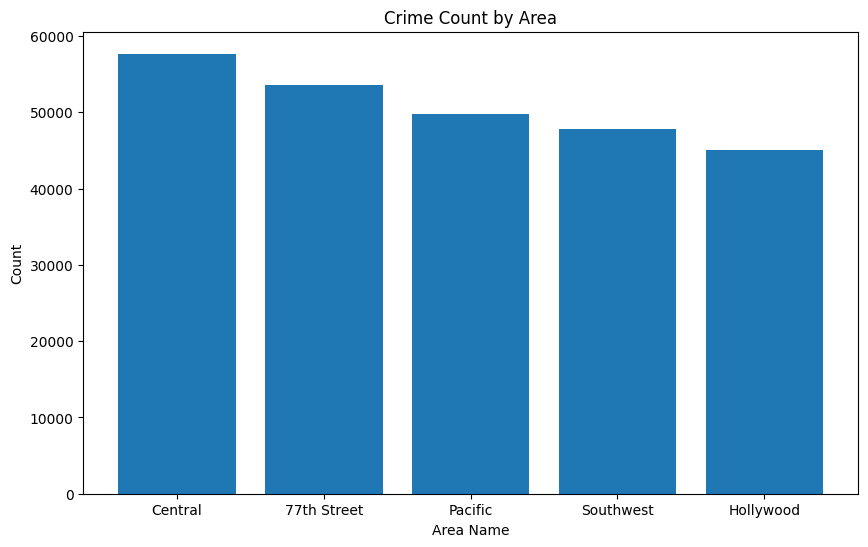

In [ ]:
crimes_pd_df = crimeCategory.limit(5).toPandas()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(crimes_pd_df['area name'], crimes_pd_df['Count'])

# Adding titles and labels
plt.title('Crime Count by Area')
plt.xlabel('Area Name')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
# Run the Spark SQL query to get the top 10 crimes
top_10_crimes_df = spark.sql("""
SELECT `Crm Cd`, `Crm Cd Desc`, COUNT(*) AS Crime_Count
FROM la_crime
GROUP BY `Crm Cd`, `Crm Cd Desc`
ORDER BY Crime_Count DESC
LIMIT 10
""")

# Show the results in the notebook
top_10_crimes_df.show()


+------+--------------------+-----------+
|Crm Cd|         Crm Cd Desc|Crime_Count|
+------+--------------------+-----------+
|   510|    VEHICLE - STOLEN|      91473|
|   624|BATTERY - SIMPLE ...|      67976|
|   354|   THEFT OF IDENTITY|      53467|
|   330|BURGLARY FROM VEH...|      52611|
|   310|            BURGLARY|      51961|
|   740|VANDALISM - FELON...|      51826|
|   230|ASSAULT WITH DEAD...|      48876|
|   440|THEFT PLAIN - PET...|      43402|
|   626|INTIMATE PARTNER ...|      42729|
|   420|THEFT FROM MOTOR ...|      32875|
+------+--------------------+-----------+



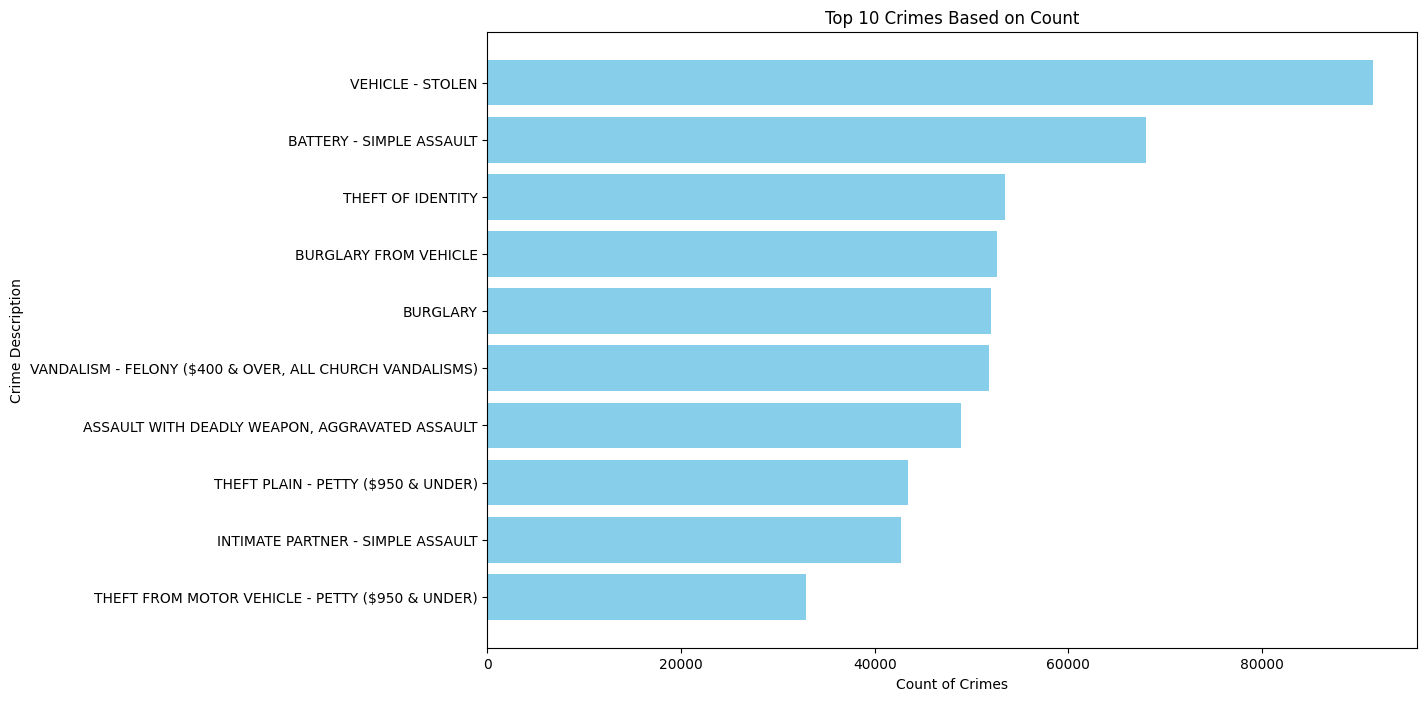

In [ ]:
# Convert the Spark DataFrame to a Pandas DataFrame for plotting
top_10_crimes_pd = top_10_crimes_df.toPandas()

# Create a bar plot of the top 10 crimes
plt.figure(figsize=(12, 8))
plt.barh(top_10_crimes_pd['Crm Cd Desc'], top_10_crimes_pd['Crime_Count'], color='skyblue')
plt.xlabel('Count of Crimes')
plt.ylabel('Crime Description')
plt.title('Top 10 Crimes Based on Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


In [ ]:
# Execute the Spark SQL query to get the yearly crime count
yearly_crime_count_df = spark.sql("""
SELECT YEAR(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a')) AS Year, COUNT(*) AS Crime_Count
FROM la_crime
GROUP BY YEAR(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a'))
ORDER BY Year
""")

# Show the results in the notebook
yearly_crime_count_df.show()

+----+-----------+
|Year|Crime_Count|
+----+-----------+
|2020|     199482|
|2021|     209451|
|2022|     234436|
|2023|     209581|
+----+-----------+



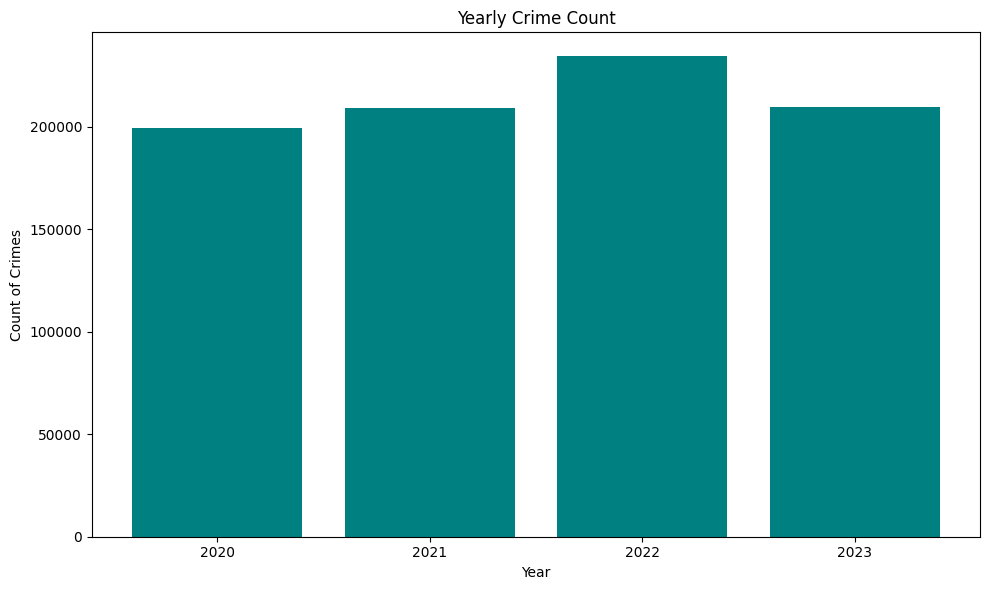

In [ ]:
yearly_crime_count_pd = yearly_crime_count_df.toPandas()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_crime_count_pd['Year'], yearly_crime_count_pd['Crime_Count'], color='teal')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.title('Yearly Crime Count')

# Set x-axis ticks to the discrete years found in the DataFrame
plt.xticks(yearly_crime_count_pd['Year'].unique())

plt.tight_layout()  # Adjust the layout to fit the x-axis labels
plt.show()

In [ ]:
# Run the Spark SQL query to get the monthly crime count for the years 2020 to 2023
monthly_crime_count_df = spark.sql("""
SELECT YEAR(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a')) AS Year,
       MONTH(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a')) AS Month,
       COUNT(*) AS Crime_Count
FROM la_crime
WHERE YEAR(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a')) BETWEEN 2020 AND 2023
GROUP BY YEAR(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a')), MONTH(TO_DATE(`DATE OCC`, 'MM/dd/yyyy hh:mm:ss a'))
ORDER BY Year, Month
""")

# Show the results in the notebook
monthly_crime_count_df.show()

+----+-----+-----------+
|Year|Month|Crime_Count|
+----+-----+-----------+
|2020|    1|      18496|
|2020|    2|      17255|
|2020|    3|      16165|
|2020|    4|      15683|
|2020|    5|      17204|
|2020|    6|      17034|
|2020|    7|      17121|
|2020|    8|      16874|
|2020|    9|      15639|
|2020|   10|      16491|
|2020|   11|      15574|
|2020|   12|      15946|
|2021|    1|      16552|
|2021|    2|      15411|
|2021|    3|      16320|
|2021|    4|      16057|
|2021|    5|      16989|
|2021|    6|      17156|
|2021|    7|      18659|
|2021|    8|      18374|
+----+-----+-----------+
only showing top 20 rows



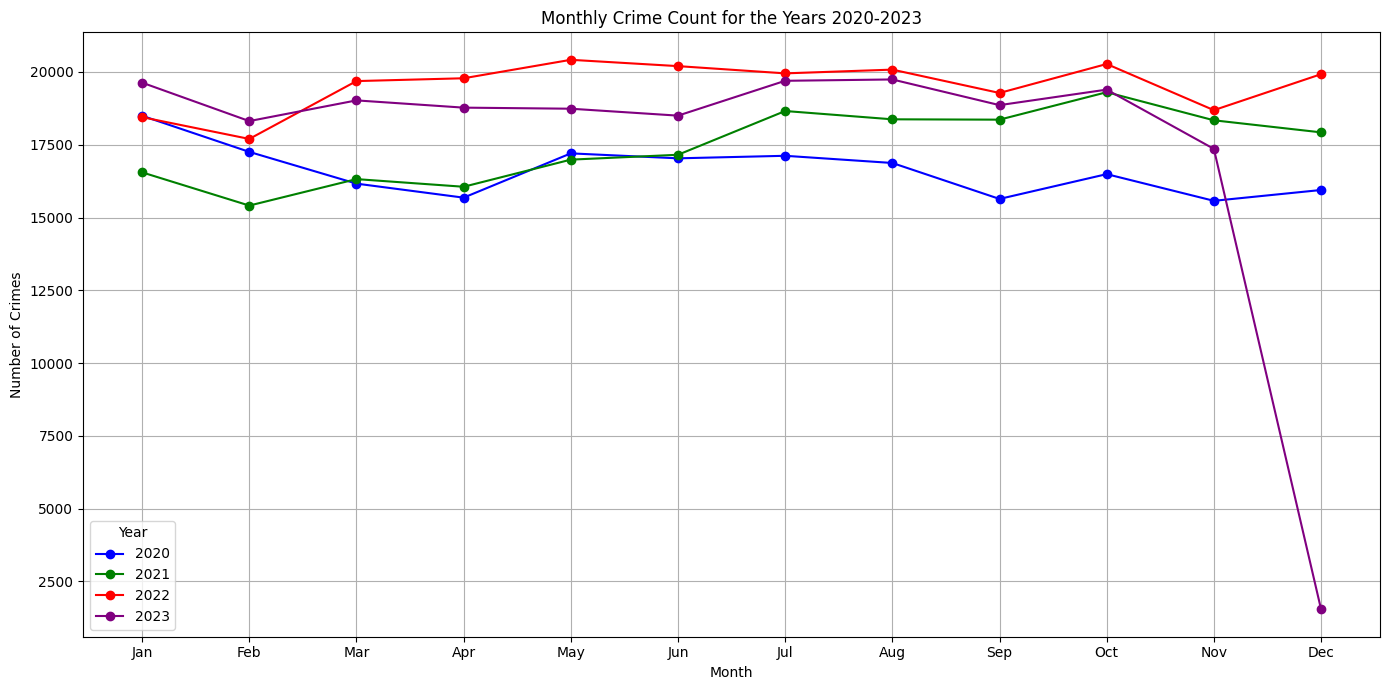

In [ ]:
# Convert the Spark DataFrame to a Pandas DataFrame
monthly_crime_count_pd = monthly_crime_count_df.toPandas()

# Convert columns to appropriate data types
monthly_crime_count_pd['Year'] = monthly_crime_count_pd['Year'].astype(int)
monthly_crime_count_pd['Month'] = monthly_crime_count_pd['Month'].astype(int)

# Pivot the DataFrame to get months as rows and years as columns
crime_count_pivot = monthly_crime_count_pd.pivot(index='Month', columns='Year', values='Crime_Count')

# Plot a line graph for each year
plt.figure(figsize=(14, 7))

# List of colors for the lines
colors = ['blue', 'green', 'red', 'purple']

# Plotting each year in a loop
for i, year in enumerate(crime_count_pivot.columns):
    plt.plot(crime_count_pivot.index, crime_count_pivot[year], marker='o', color=colors[i], label=year)

plt.title('Monthly Crime Count for the Years 2020-2023')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
crime_count_by_hour_df = spark.sql("""
SELECT HOUR(TO_TIMESTAMP(`TIME OCC`, 'HHmm')) AS Hour, COUNT(*) AS Crime_Count
FROM la_crime
GROUP BY HOUR(TO_TIMESTAMP(`TIME OCC`, 'HHmm'))
ORDER BY Hour

""")

crime_count_by_hour_df.show()

+----+-----------+
|Hour|Crime_Count|
+----+-----------+
|   0|      35109|
|   1|      25806|
|   2|      21859|
|   3|      19085|
|   4|      16123|
|   5|      14868|
|   6|      19549|
|   7|      22031|
|   8|      31474|
|   9|      30864|
|  10|      36526|
|  11|      37034|
|  12|      57743|
|  13|      38514|
|  14|      41552|
|  15|      44480|
|  16|      44837|
|  17|      49576|
|  18|      50694|
|  19|      46786|
+----+-----------+
only showing top 20 rows



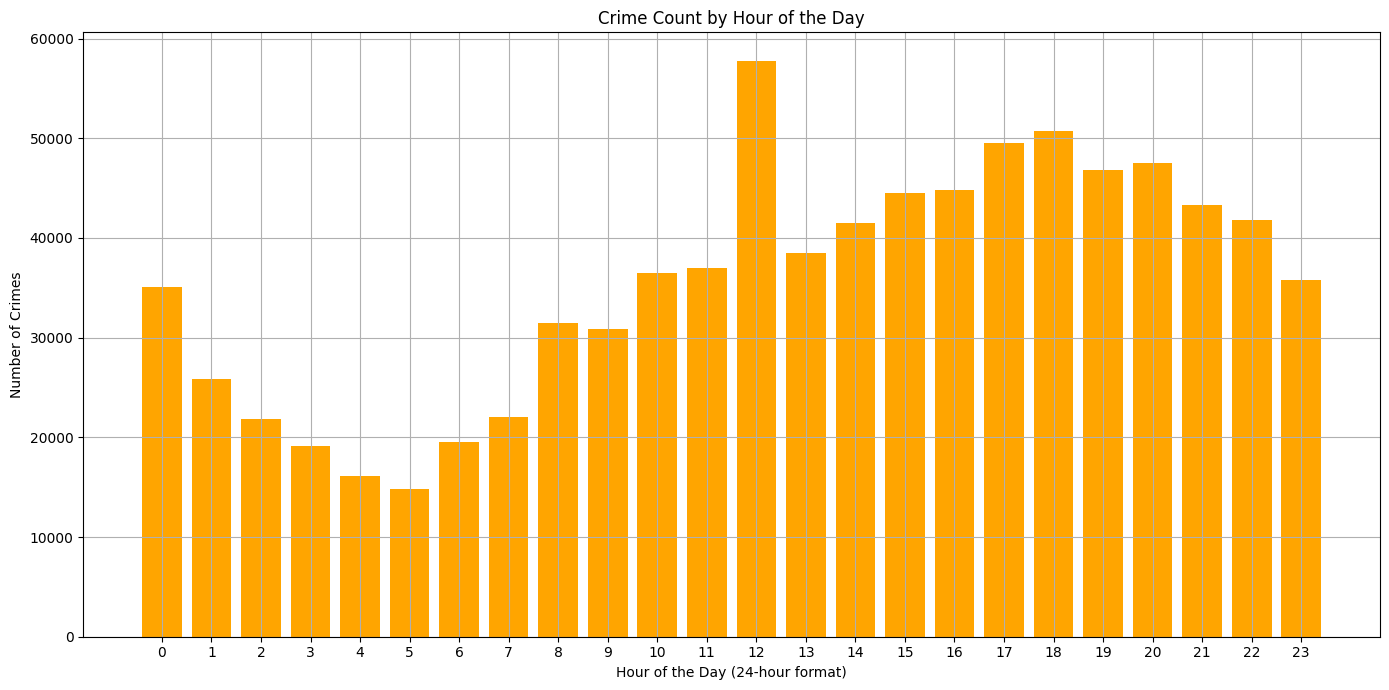

In [ ]:
crimes_by_hour_pd = crime_count_by_hour_df.toPandas()

# Convert columns to appropriate data types
crimes_by_hour_pd['Hour'] = crimes_by_hour_pd['Hour'].astype(int)

# Plotting the bar chart
plt.figure(figsize=(14, 7))
plt.bar(crimes_by_hour_pd['Hour'], crimes_by_hour_pd['Crime_Count'], color='orange')

# Adding labels and title
plt.title('Crime Count by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))  # Set x-axis ticks to be every hour of the day

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()


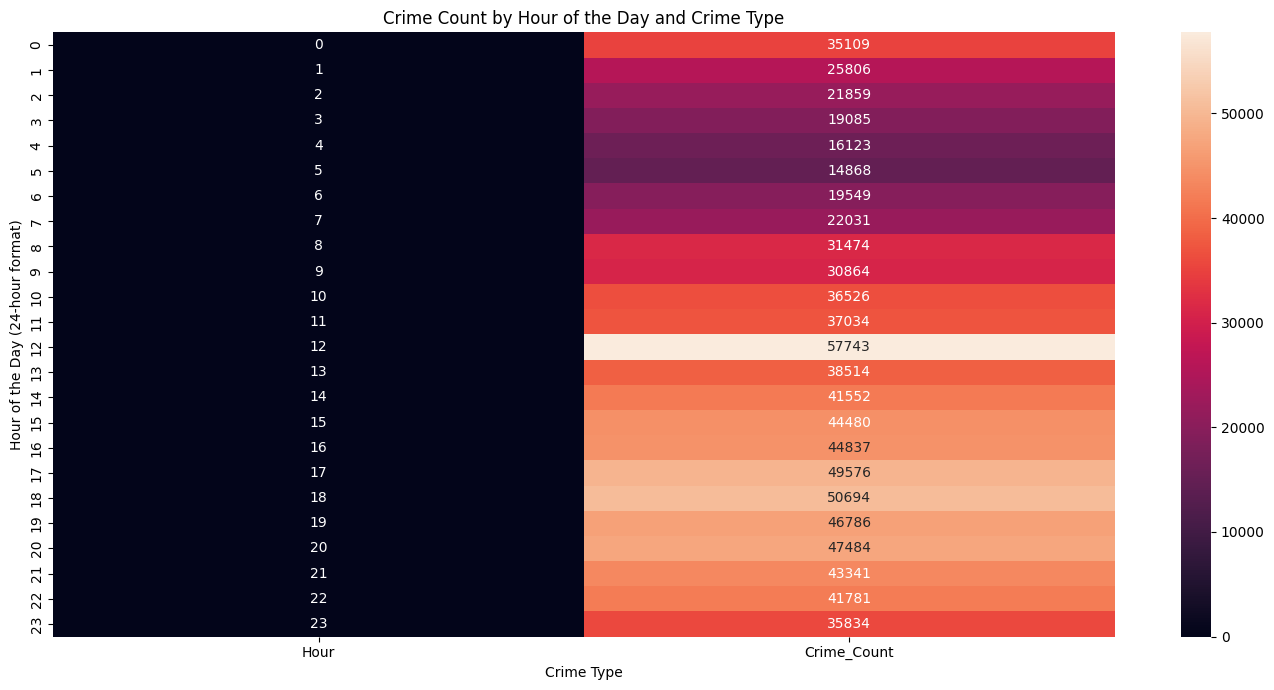

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(crimes_by_hour_pd, annot=True, fmt="d")

# Adding labels and title
plt.title('Crime Count by Hour of the Day and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Hour of the Day (24-hour format)')

# Display the graph
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col

df_opt1 = df_opt1.withColumn("latitude", col("LAT").cast("float"))
df_opt1 = df_opt1.withColumn("longitude", col("LON").cast("float"))

vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
new_df = vecAssembler.transform(df_opt1)


In [ ]:
new_df.head()

Row(DR_NO='010304468', Date Rptd='01/08/2020 12:00:00 AM', DATE OCC='01/08/2020 12:00:00 AM', TIME OCC='2230', AREA='03', AREA NAME='Southwest', Rpt Dist No='0377', Part 1-2='2', Crm Cd='624', Crm Cd Desc='BATTERY - SIMPLE ASSAULT', Mocodes='0444 0913', Vict Age='36', Vict Sex='F', Vict Descent='B', Premis Cd='501', Premis Desc='SINGLE FAMILY DWELLING', Weapon Used Cd='400', Weapon Desc='STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', Status='AO', Status Desc='Adult Other', Crm Cd 1='624', Crm Cd 2=None, Crm Cd 3=None, Crm Cd 4=None, LOCATION='1100 W  39TH                         PL', Cross Street=None, LAT='34.0141', LON='-118.2978', latitude=34.01409912109375, longitude=-118.29779815673828, features=DenseVector([34.0141, -118.2978]))

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(new_df)

# Make predictions
predictions = model.transform(new_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.7311836315711379
Cluster Centers: 
[  33.77818639 -118.28539195]
[0. 0.]
[  34.03418768 -118.30323272]
[  34.20345278 -118.47599772]


In [ ]:
training = df_opt1.sample(False, .01, 1)
training.count()

8551

In [ ]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
new_df = vecAssembler.transform(training)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(new_df)

# Make predictions
predictions = model.transform(new_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.5931037900723152
Cluster Centers: 
[  34.05904004 -118.29399003]
[0. 0.]
[  34.2005979  -118.48488685]
[  33.92525377 -118.3167967 ]


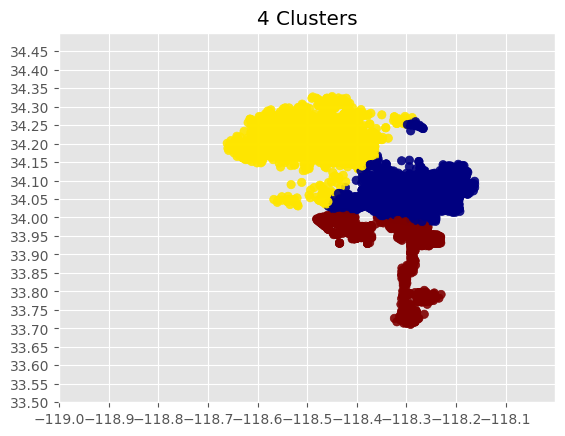

In [ ]:
import matplotlib.pyplot as plt
from plotnine import ggplot
#from ggplot import *
import warnings
import numpy as np

plt.style.use('ggplot')

q8_res = predictions.toPandas()

fig, ax = plt.subplots()

ax.set_xlim(-119, -118)
ax.set_ylim(33.5, 34.5)
ax.set_xticks(np.arange(-119, -118, 0.1))
ax.set_yticks(np.arange(33.5, 34.5, 0.05))

ax.scatter(q8_res['longitude'], q8_res['latitude'], c=(q8_res['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("4 Clusters")
display()

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np

In [ ]:
df_opt1_pandas = df_opt1.toPandas()

In [ ]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_opt1_pandas,
    geometry=gpd.points_from_xy(df_opt1_pandas.LON, df_opt1_pandas.LAT)
)

In [ ]:
# Convert LON and LAT to numeric types if they are not already
gdf['LON'] = pd.to_numeric(gdf['LON'], errors='coerce')
gdf['LAT'] = pd.to_numeric(gdf['LAT'], errors='coerce')

# Drop rows with invalid or missing coordinate data
gdf = gdf.dropna(subset=['LON', 'LAT'])

gdf = gdf[(gdf['LAT'] > 33.7) & (gdf['LAT'] < 34.3) & (gdf['LON'] > -118.7) & (gdf['LON'] < -118.1)]

In [ ]:
print(gdf.head())

       DR_NO               Date Rptd                DATE OCC TIME OCC AREA  \
0  010304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM     2230   03   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     0330   01   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM     1200   01   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     1730   15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     0415   19   

     AREA NAME Rpt Dist No Part 1-2 Crm Cd  \
0    Southwest        0377        2    624   
1      Central        0163        2    624   
2      Central        0155        2    845   
3  N Hollywood        1543        2    745   
4      Mission        1998        2    740   

                                         Crm Cd Desc  ... Crm Cd 2 Crm Cd 3  \
0                           BATTERY - SIMPLE ASSAULT  ...     None     None   
1                           BATTERY - SIMPLE ASSAULT  ...     None     None   
2          SEX OF

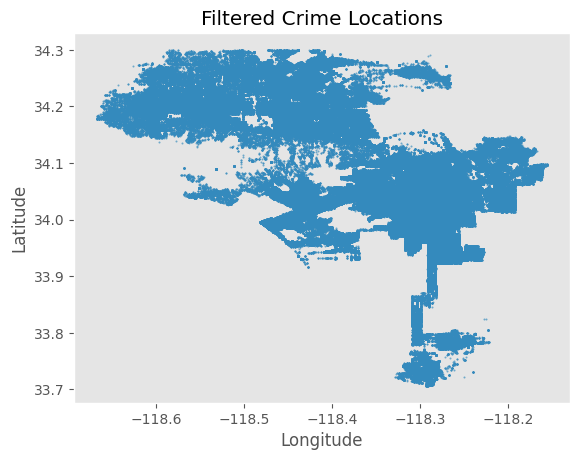

In [ ]:
# Plot the filtered data points to visually inspect the coordinates
gdf.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, s=1)
plt.title('Filtered Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [ ]:
# Set the coordinate reference system (CRS) to EPSG:4326
gdf.set_crs("EPSG:4326", inplace=True)

# Convert to Web Mercator for better visualization in a flat map
gdf = gdf.to_crs(epsg=3857)

In [ ]:
# Extract the x and y coordinates of the points as an array for the KDE
xy = np.vstack([gdf.geometry.x, gdf.geometry.y]).T

In [ ]:
# Fit the KDE model
kde = KernelDensity(bandwidth=1000, kernel='gaussian')
kde.fit(xy)  # Fit the model on the coordinates array

KernelDensity(bandwidth=1000)

In [ ]:
# Create a grid of sample points where you want to compute the KDE
xx, yy = np.meshgrid(np.linspace(xy[:, 0].min(), xy[:, 0].max(), 100),
                     np.linspace(xy[:, 1].min(), xy[:, 1].max(), 100))


In [ ]:
# Stack the coordinates for the sample points
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

In [ ]:
# Evaluate the KDE model on the grid of sample points
zz = np.exp(kde.score_samples(xy_sample))

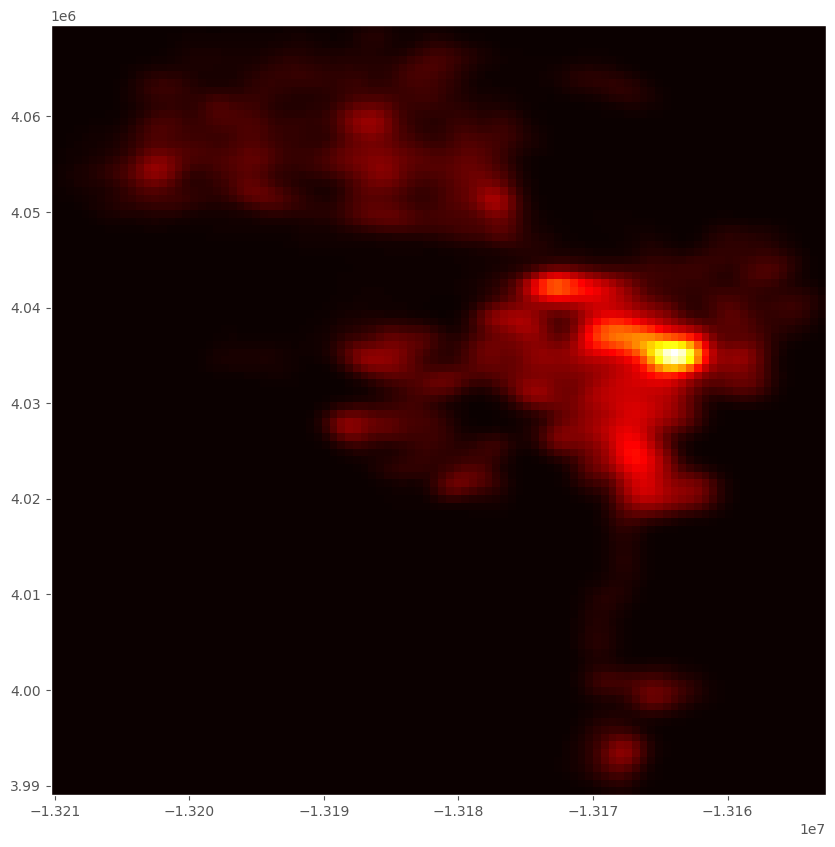

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(xx, yy, zz.reshape(xx.shape), shading='auto', cmap=plt.cm.hot)
plt.show()

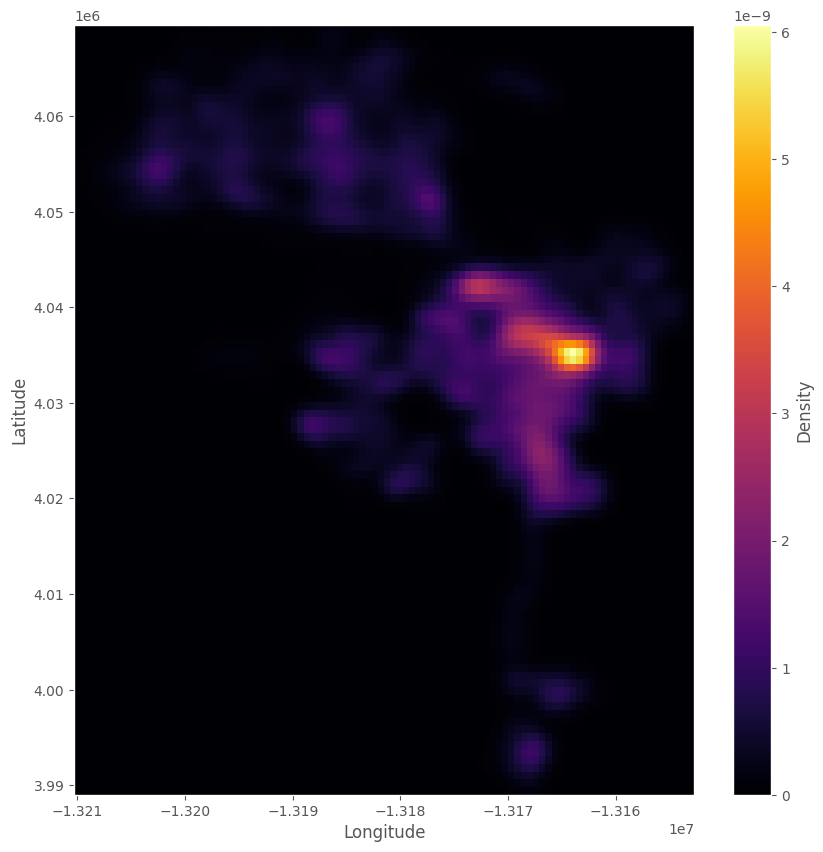

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='white')
ax.set_facecolor('white')
heatmap = ax.pcolormesh(xx, yy, zz.reshape(xx.shape), shading='auto', cmap=plt.cm.inferno)

# Add color bar for reference
cbar = fig.colorbar(heatmap)
cbar.set_label('Density')

# Set axis limits and labels (if applicable)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

Text(0, 0.5, 'Latitude')

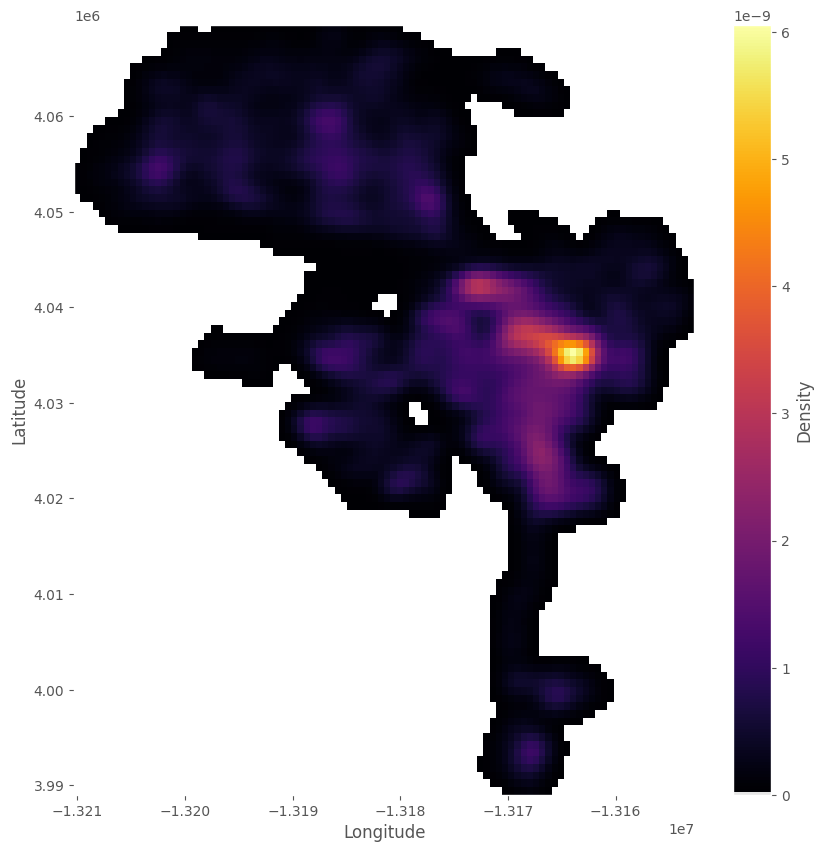

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

white = (1, 1, 1, 0)  # White, transparent
color_map = plt.cm.inferno  # Use the inferno colormap

# Create a new colormap from the inferno colormap
# The first color (white) will be at the bottom, with an alpha of 0 (transparent)
colors = [white] + [color_map(i) for i in range(color_map.N)]
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

# Now use this colormap in pcolormesh
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_facecolor('white')  # Set the face color to white
heatmap = ax.pcolormesh(xx, yy, zz.reshape(xx.shape), shading='auto', cmap=cm)

# Add color bar for reference
cbar = fig.colorbar(heatmap)
cbar.set_label('Density')

# Set axis limits and labels (if applicable)
# ax.set_xlim(x_min, x_max)
# ax.set_ylim(y_min, y_max)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

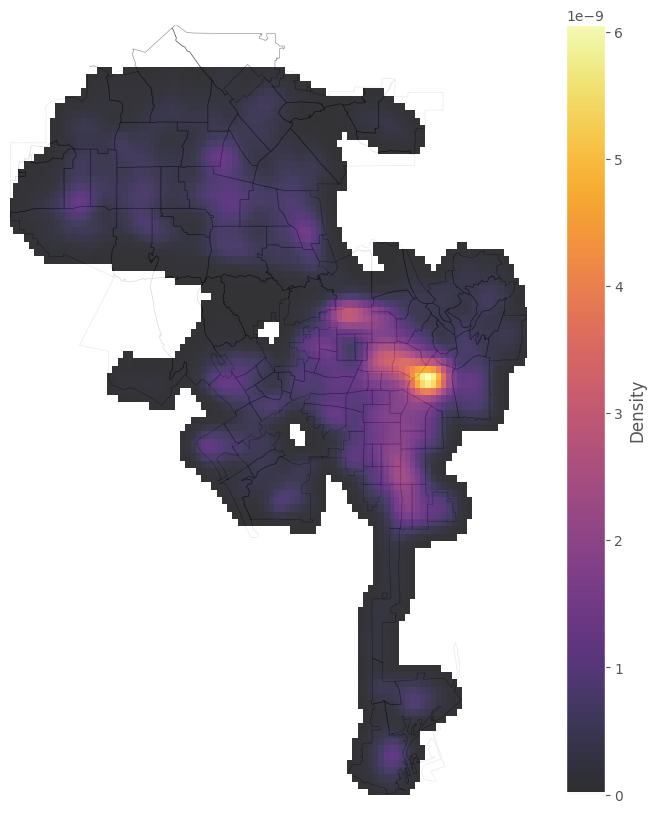

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load LA map shapefile or GeoJSON file
la_map_gdf = gpd.read_file('/content/drive/MyDrive/Big Data/los-angeles.geojson')  # Correct the file path and extension

# Ensure LA map is in Web Mercator projection (for consistency with the heatmap)
la_map_gdf = la_map_gdf.to_crs(epsg=3857)

# Create a color map with transparency
white = (1, 1, 1, 0)  # White, transparent
color_map = plt.cm.inferno  # Use the inferno colormap
colors = [white] + [color_map(i) for i in range(color_map.N)]
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_facecolor('white')  # Set the face color to white

# Plot LA map
la_map_gdf.plot(ax=ax, color='none', edgecolor='black',alpha=0.4)

# Overlay the heatmap on the same axis
# ... [code to create xx, yy, and zz for the heatmap]
heatmap = ax.pcolormesh(xx, yy, zz.reshape(xx.shape), shading='auto', cmap=cm, alpha=0.8)

# Add color bar for reference
cbar = fig.colorbar(heatmap)
cbar.set_label('Density')

# Adjust the x and y limits to the bounds of the LA map for a tighter fit
ax.set_xlim(la_map_gdf.total_bounds[0], la_map_gdf.total_bounds[2])
ax.set_ylim(la_map_gdf.total_bounds[1], la_map_gdf.total_bounds[3])

# Remove axis for a cleaner look
ax.axis('off')

plt.show()


In [ ]:
# Perform the SQL query to get the count of crimes by premise description
# and order by the count in descending order, limiting to the top N
top_premises = spark.sql("""
    SELECT `Premis Desc`, COUNT(*) as `Crime Count`
    FROM la_crime
    GROUP BY `Premis Desc`
    ORDER BY `Crime Count` DESC
    LIMIT 10
""")

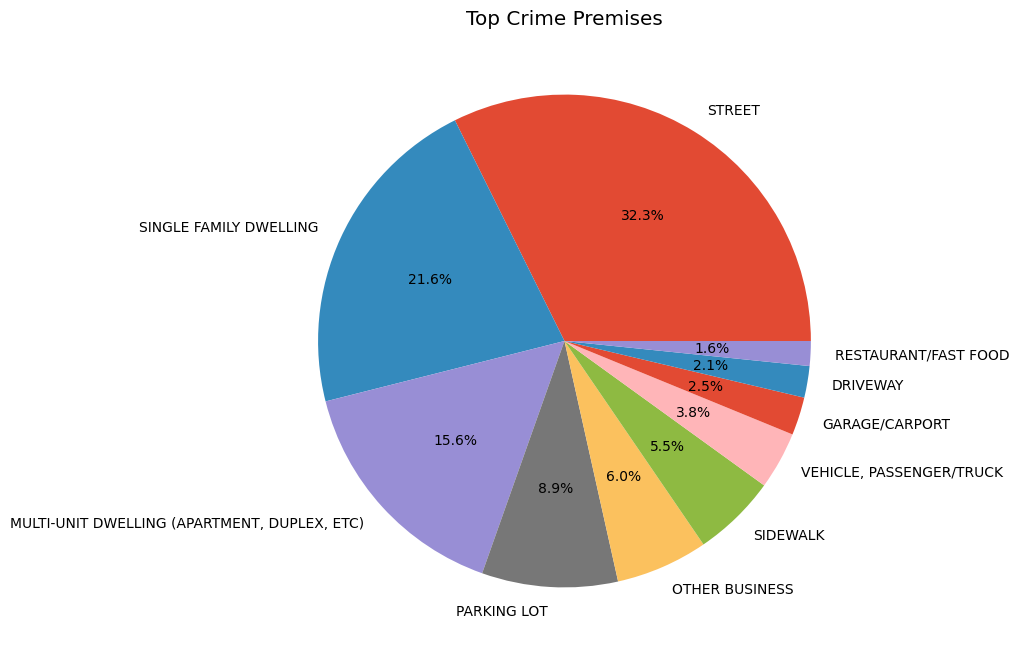

In [ ]:
# Convert the results to a Pandas DataFrame
top_premises_pd = top_premises.toPandas()

# Plot the pie chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(top_premises_pd['Crime Count'], labels=top_premises_pd['Premis Desc'], autopct='%1.1f%%')
plt.title('Top Crime Premises')
plt.show()

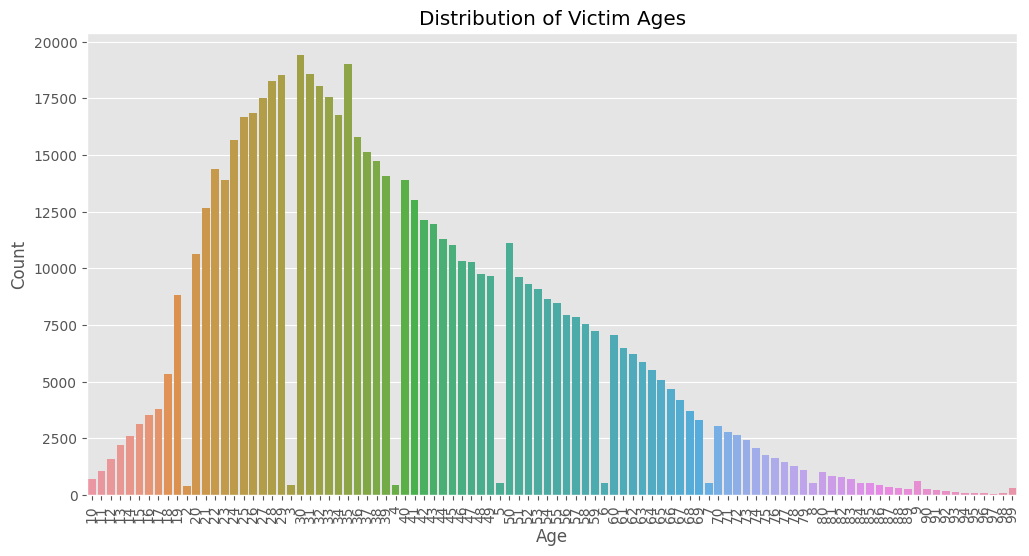

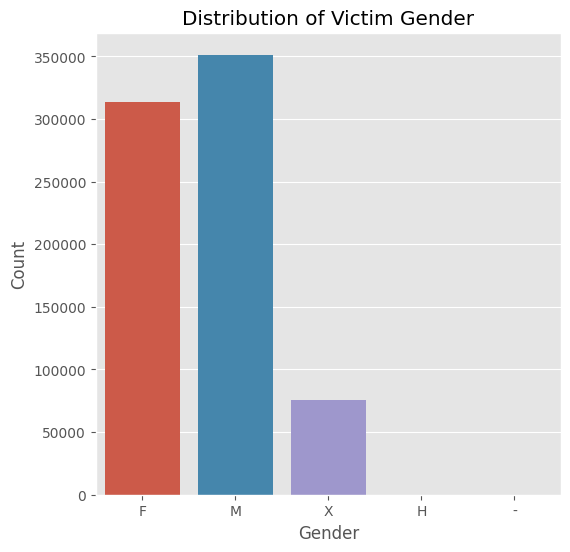

In [ ]:
import seaborn as sns

# Perform the SQL query to get the distribution of victim ages
victim_age_distribution = spark.sql("""
    SELECT `Vict Age`, COUNT(*) as `Count`
    FROM la_crime
    WHERE `Vict Age` > 0 AND `Vict Age` < 100  -- Assuming valid age range
    GROUP BY `Vict Age`
    ORDER BY `Vict Age`
""")

# Convert the results to a Pandas DataFrame
victim_age_distribution_pd = victim_age_distribution.toPandas()

# Perform the SQL query to get the distribution of victim gender
victim_gender_distribution = spark.sql("""
    SELECT `Vict Sex`, COUNT(*) as `Count`
    FROM la_crime
    GROUP BY `Vict Sex`
""")

# Convert the results to a Pandas DataFrame
victim_gender_distribution_pd = victim_gender_distribution.toPandas()

# Plot the distribution of victim ages using a histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Vict Age', y='Count', data=victim_age_distribution_pd)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

# Plot the distribution of victim gender using a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Vict Sex', y='Count', data=victim_gender_distribution_pd)
plt.title('Distribution of Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Stop the Spark session
spark.stop()
